Существует два метода обучения регрессонной модели

*   *Применение прямого уравнения*

Уравнение вычесляет параметры, сводящие к минимуму **функцию издержек** (на обучающем наборе)

*   *Градиентный спуск*

Постеменно корректирует параметры, чтобы доввести до минимума значение **функции издержек** (на обучающем наборе)



# 1) Линейная регрессия

## Нормальное уравнение

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

In [ ]:
X_b = np.c_[np.ones((100,1)), X] # добавляет 1 к каждому образцу
# np.c_ конкатенирует столбцы

In [ ]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.5172339 ],
       [3.00759845]])

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [ ]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.5172339 ],
       [10.53243079]])

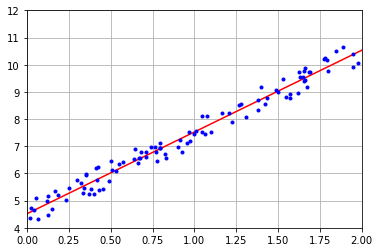

In [ ]:
# прогнозы модели

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 4, 12])
plt.grid()
plt.show()

На sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.5172339]), array([[3.00759845]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.5172339 ],
       [10.53243079]])

### Вычислительная сложность

O(n^2.4)-O(n^3) n - количество признаков


Обучение модели:
Нормальное уравнеине становиться очень медленным, когда количество признаков более 100 000

Выработка прогнозов:
Линейно относительно числа образцов.

## Градиентный спуск

Измеряет локальный градиент *функции ошибок* (издержек) (например MSE) и двигается в направлении убывающего градиента.

Важным параметром является **размер шагов**, определяемый гиперпараметром **скорости обучения**. Нужно что-то среднее. т.к если выбрать большой шаг, то алшорим "проскочит" минимум, а если маленкий, то алгоритм будет совершать большое количество итераций.

Начальное значение выбирается случайно.

Функции издержек могут выглядить как угодно, со впадинами и выступами, плато.

Если функция выпукла, то локальные минимумы отсутствуют. MSE для линейной можели является выпуклой и непрерывной (не изменяет налон неожиданным образом)

Функция издержек может иметь форму продоговатой чаши, если масштабы призков сильно отличаются. Из-за этого минимум достигается за долгое время.

При использовании градиентного спуска необходимо обеспечить наличие у всех признаков похожего масштаба (StandardScaler)

### Пакетный градиентный спуск

In [ ]:
eta = 0.1  # скорость обучения
n_interations = 1000 # количество итераций
m = 100 # количество экземпляров

theta = np.random.rand(2,1) # cлучайные веса

In [ ]:
for ineration in range(n_interations):
  gradients = 2/m*X_b.T.dot(X_b.dot(theta)-y)
  theta = theta - eta*gradients

In [ ]:
theta 

array([[4.5172339 ],
       [3.00759845]])

Получилось тоде самое, что и при применении нормального уравнения

Для нахождения хорошей **скорости обучения** можно применить `GridSerach`.
**Количество итераций** можно ограничить, если нам нужно отсечь можеои, которые требуют слишком большого времени на схождение.

Как находить опитимальное число итераций?

> Установить большое число итераций


> Прекращение работы алгоритма, когда вектор-градиент становиться маленьким.

### Стохастический ГС

1. Использует  **один** случайный образец для вычисления градиента, когда как пакрный ГС на каждой итерации использует весь обучающий набор.

2. Стохастическая природа 

График обучения - функция, определяюшая скорость обучения. Оптимальный вариант - поспепенно снижать скорость обучения, чтобы избегать локальных минимумов и в то же время сохранять хорошую скорость обучения.

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # гиперпараметры графика обучения
m = 100 

In [ ]:
def learning_schedule(t): # функция обучения
  return t0/(t+t1)

In [ ]:
theta = np.random.rand(2,1)

In [ ]:
# стохастический ГС с применение простого графика обучения 
for epoch in range(n_epochs):
    for i in range(m): # для каждого экземпляра из 100
        random_index = np.random.randint(m) # индекс любого экземпляра из выборки 1-100
        xi = X_b[random_index:random_index+1] # X_b - это синтезированные тестовые данные
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i) # скорость обучения
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.52519342],
       [3.00513581]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.50774521]), array([3.0168911]))

### Мини-пакетный ГС

Gradient Discent:
1. Batch GD
2. Stochastic GD
3. Mini-bath GD

BSD вычисляет градиент функции потерь(издержек)/лосса на основе полного обучающего набора на кажом шаге.

SGD вычисляет на основе одного образца (можно проводить обучение на больших объемах)

M-bGD вычисяет графиенты на небольших случайных наборах образцов


# Полиноминальная регрессия

Можно применить линейную модель для подгонки к нелинейным данным. Простой способ предполагает добавление степеней каждого из призныаков и последующее обучение на расширенном наборе признаков.

In [ ]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [ ]:
m =100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

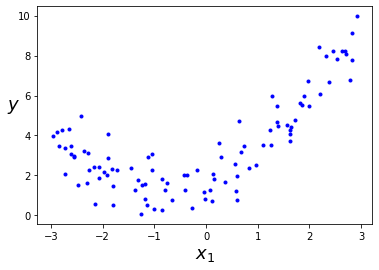

In [ ]:
plt.plot(X, y, "b.");
plt.xlabel("$x_1$", fontsize=18);
plt.ylabel("$y$", rotation=0, fontsize=18);

Добавим признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

In [ ]:
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

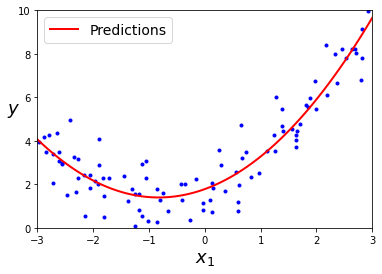

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Кривые обучения

Для оценивания модели можно использовать


*   Метрики CV
*   Кривые обучения



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

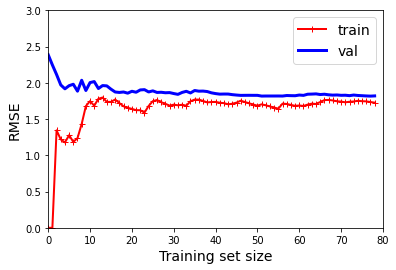

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()

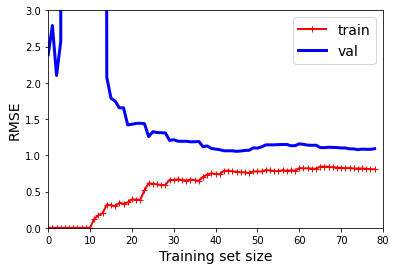

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()

# Регуляризованные линейные модели

# Новый раздел

Для линейной модели регуляризация обычно достигается путем ограниччения весов модели.

**Фукция издержек** применяеся во время обучения.

**Мера производительности** используется для проверки.

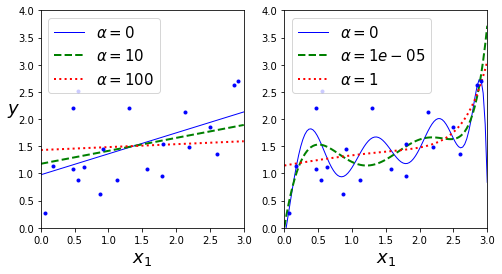

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

## Гребневая регрессия

Перед выполнение ридж-регрессии необходимо масштабировать данные т.к. она чувствительна к масштабу входных признаков.

Как и в случае линейно регресии мы можем производитьребневую либо вычисляя **уравнение в аналитическом виде**, либо выполняя **градиентный спуск**.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [ ]:
sgd_reg = SGDRegressor(max_iter=50,
                       tol=-np.infty,
                       penalty="l2",
                       random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.49905184])

## Лассо регрессия

Добавляет к функции издержек член регуляризации, но использует первую норму весового вектора.

Стремиться полностью исключить все веса наименее важных признаков. Устанавливает их в ноль.

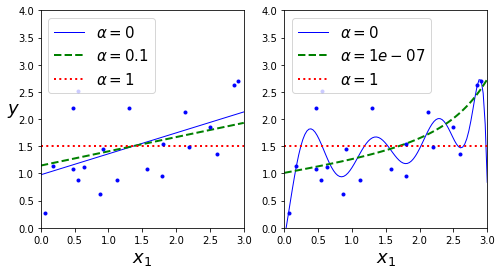

In [ ]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), tol=1, random_state=42)

plt.show()

## Эластичная сеть

# 2) Логистическая регрессия

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris["data"][:, 3:] # Выбрали признак ширины
y = (iris["target"] ==2).astype(np.int) # 1, если ирис виргинский

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


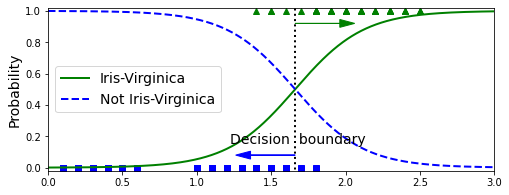

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
# plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Многопеременная логистическая регрессия 

Обобщение для **поддержек множества классов**, без необходимости в обучении и комбинировании многочисленных двоичных классификаторов.

In [ ]:
X = iris["data"][:, (2, 3)] # выбираем 2 признака, длину и ширину
y = iris["target"]

По умолчанию класс `LogisticRegression` применяет стратегию "один против всех", когда он обучается на более чем 2х классах, но можно переключитьего в на многопеременную регрессию, установив гиперпараметр `multi_class="multinominal"`

In [ ]:
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])